# Persiapan Dataset

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [62]:
df = pd.read_csv("dataset3.csv")

In [63]:
df.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G17,G18,G19,G20,G21,G22,G23,G24,G25,Penyakit
0,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya,ya,...,tidak,tidak,tidak,tidak,tidak,tidak,ya,tidak,tidak,P001
1,tidak,tidak,tidak,ya,tidak,tidak,tidak,ya,ya,ya,...,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,P001
2,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya,ya,...,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,P001
3,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya,ya,...,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,P001
4,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya,ya,...,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,tidak,P001


In [64]:
duplikad = df.duplicated().sum()
print(f'Jumlah duplikad : {duplikad}')

Jumlah duplikad : 37


In [65]:
print('Missing Value :')
print(df.isnull().sum())

Missing Value :
G1          0
G2          0
G3          0
G4          0
G5          0
G6          0
G7          0
G8          0
G9          0
G10         0
G11         0
G12         0
G13         0
G14         0
G15         0
G16         0
G17         0
G18         0
G19         0
G20         0
G21         0
G22         0
G23         0
G24         0
G25         0
Penyakit    0
dtype: int64


# EDA

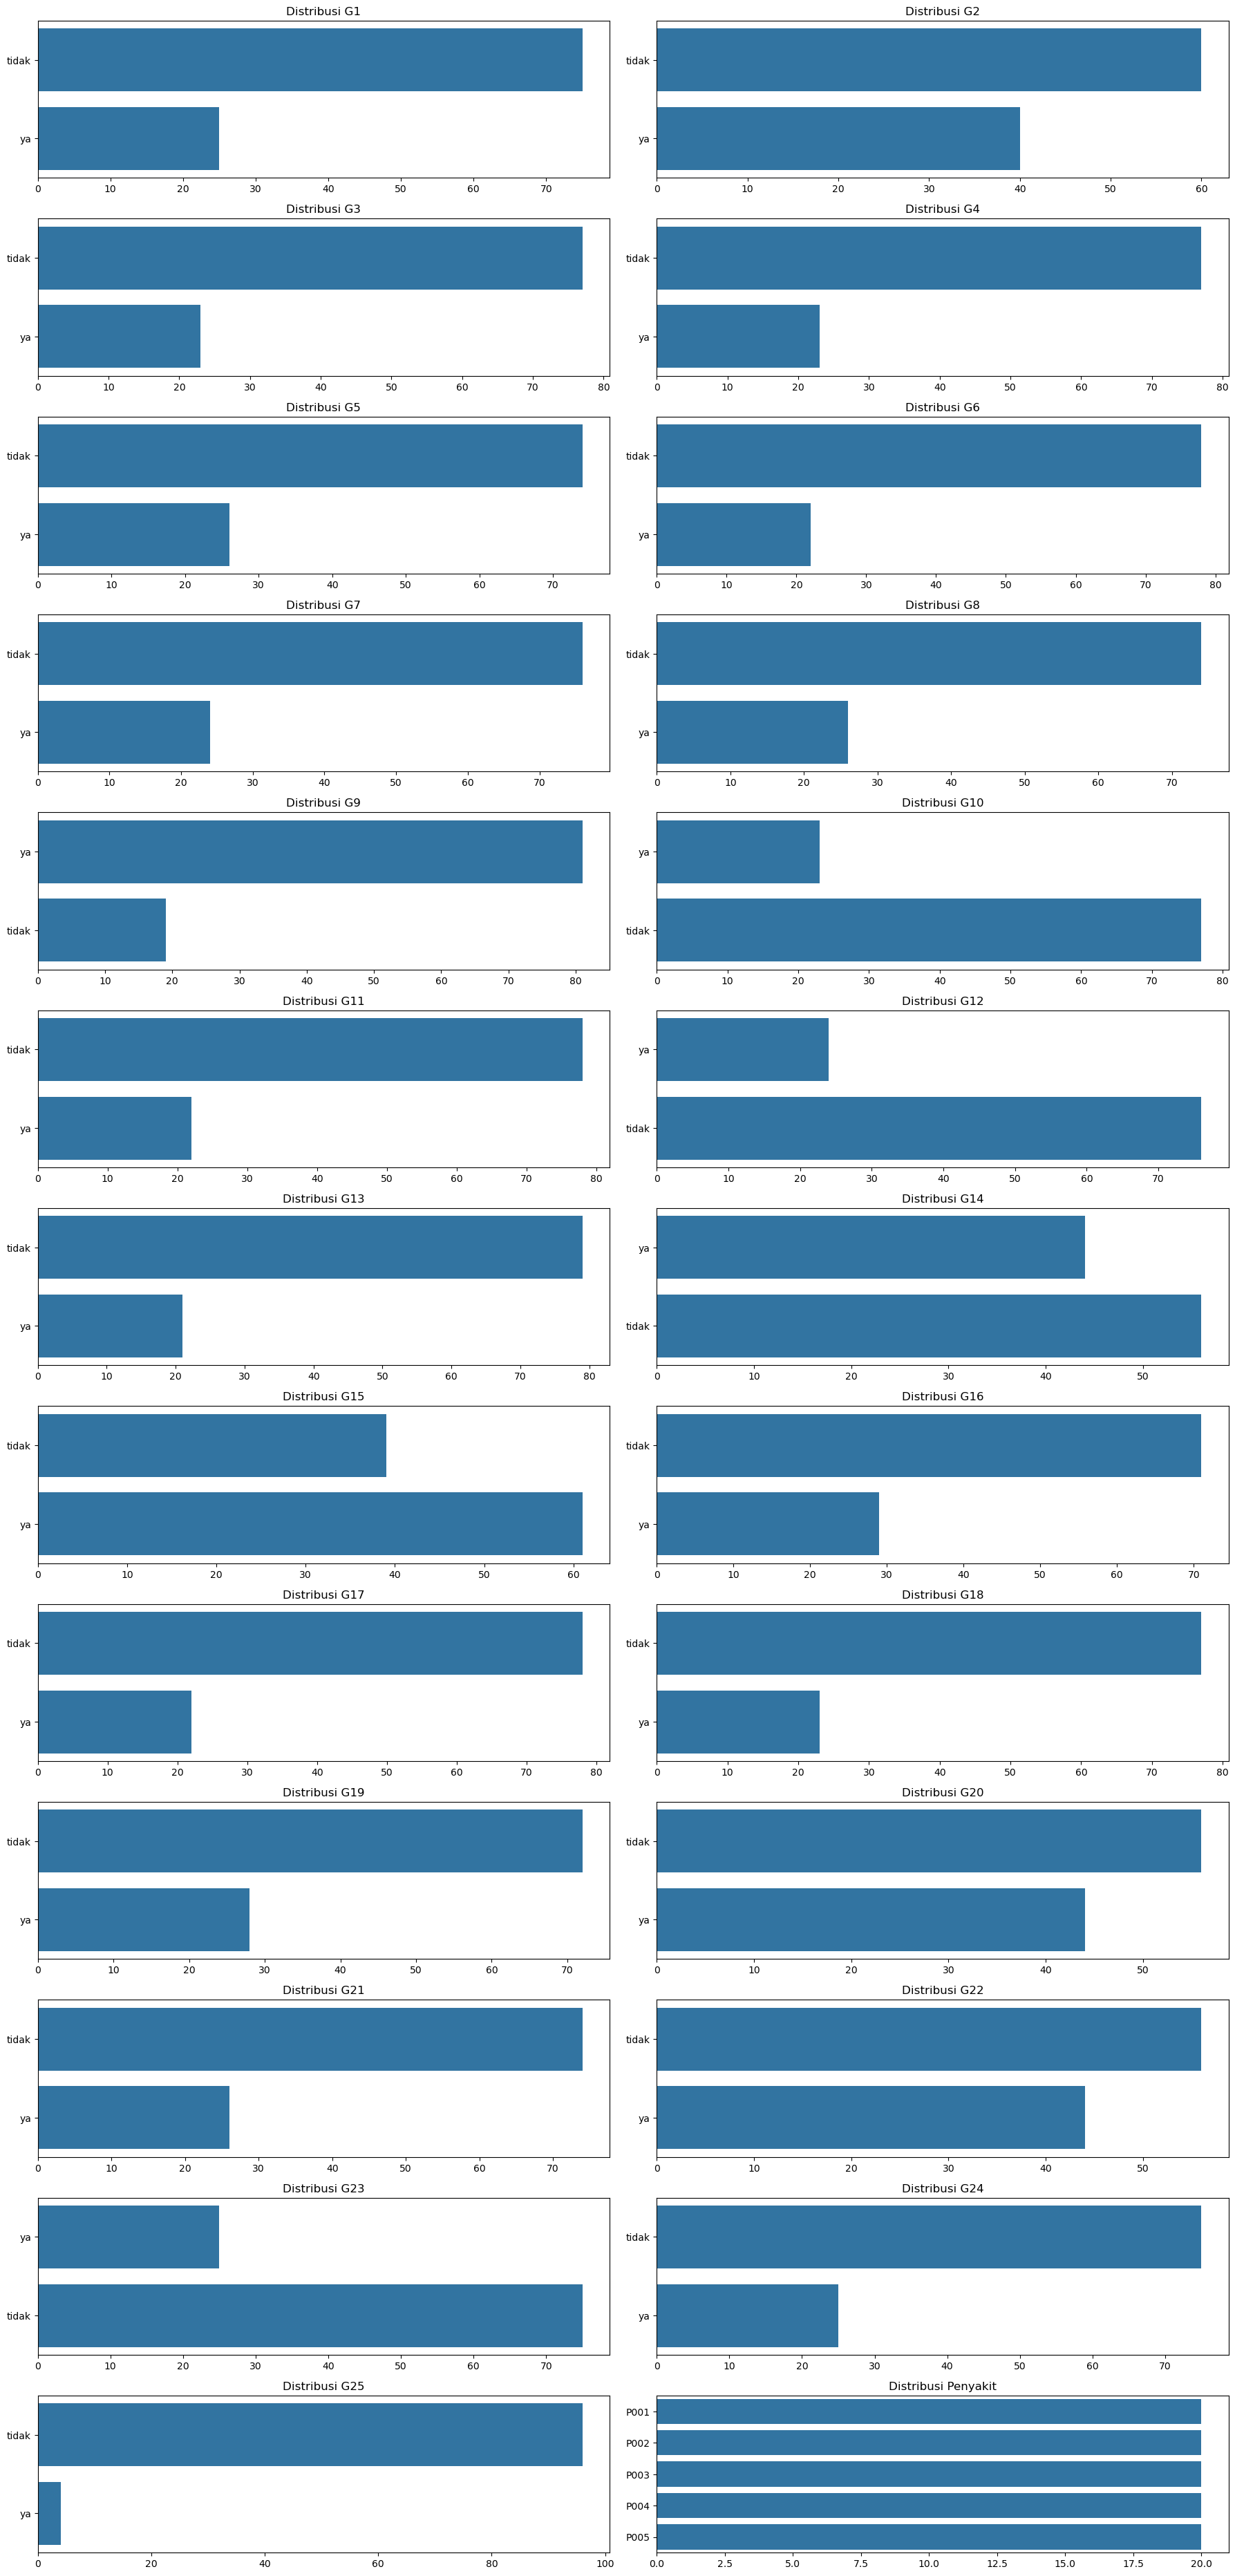

In [66]:
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(18, 40))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(14, 2, i)
    sns.countplot(y=df[column])
    plt.title(f'Distribusi {column}')
    plt.ylabel(None)
    plt.xlabel(None)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10696\4070450277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Penyakit', data=df, palette='viridis')


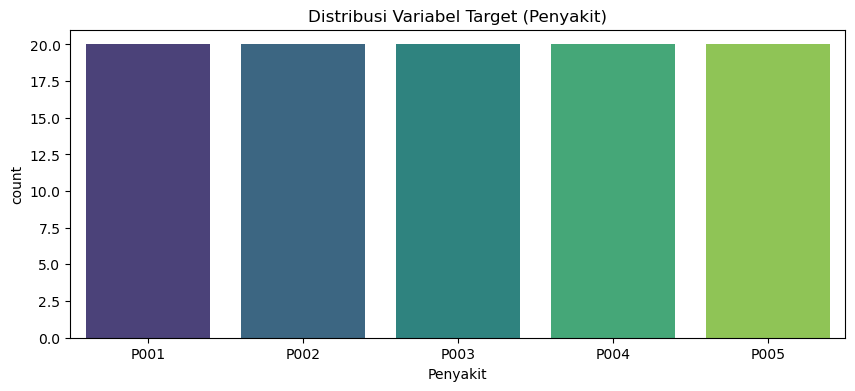

In [67]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(10, 4))
sns.countplot(x='Penyakit', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Penyakit)')
plt.show()

# Label Encoder

In [68]:
label_encoder = LabelEncoder()

colomn = ['G1', 'G2', 'G3', 'G4','G5','G6','G7','G8','G9','G10','G11','G12','G13','G14','G15','G16','G17','G18','G19','G20','G21','G22','G23','G24','G25', 'Penyakit']

for change in colomn:
    df[change] = label_encoder.fit_transform(df[change])



In [69]:
df.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G17,G18,G19,G20,G21,G22,G23,G24,G25,Penyakit
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


# Data Splitting

In [70]:
scaler = MinMaxScaler()

X = df.drop(columns=['Penyakit'])
y = df['Penyakit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training Set : X_train = {X_train.shape}, y_train = {y_train.shape}')
print(f'Test Set : X_test = {X_test.shape}, y_test = {y_test.shape}')

Training Set : X_train = (80, 25), y_train = (80,)
Test Set : X_test = (20, 25), y_test = (20,)


# Pelatihan Model

In [71]:
nb = GaussianNB().fit(X_train, y_train)
print('pelatihan selesai')

pelatihan selesai


# Evaluasi Model

In [72]:
y_pred = nb.predict(X_test)

results = {
    'Model': 'Naive Bayes (NB)',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred, average='weighted')
}

# membuat DataFrame
df = pd.DataFrame.from_dict(results, orient='index')

df = df.transpose()

print(df)

              Model Accuracy Precision Recall F1-Score
0  Naive Bayes (NB)      1.0       1.0    1.0      1.0


#### Note
- Accuracy = Persentase prediksi yang benar dari keseluruhan data.
- Precision = Proporsi prediksi positif yang benar dari semua prediksi positif.
- Recall = Proporsi contoh positif yang benar-benar diidentifikasi sebagai positif dari semua contoh positif yang ada.
- F1-Score = Nilai harmonik rata-rata antara precision dan recall.

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


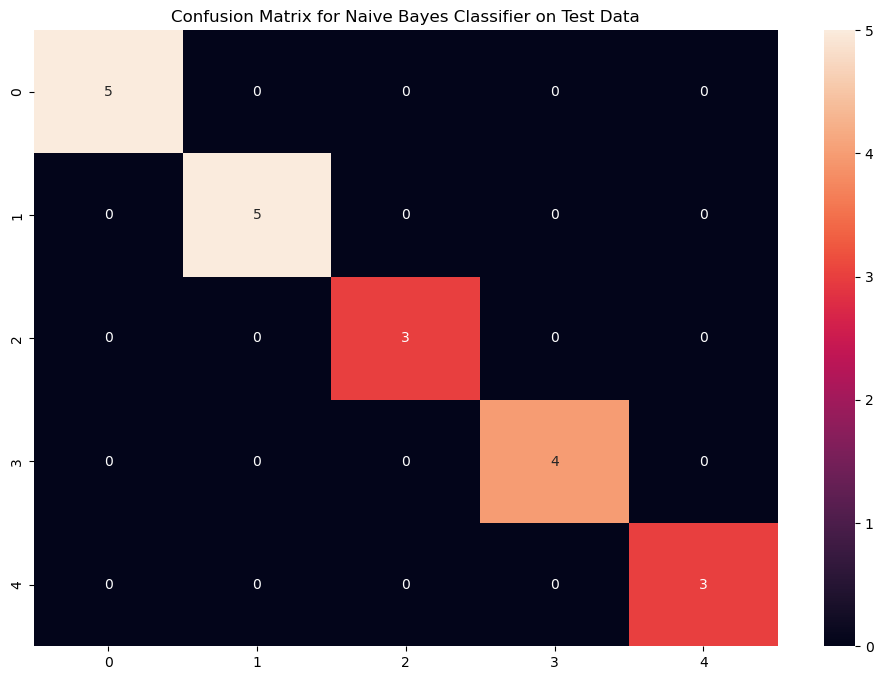

In [73]:
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()


# Menyimpan Model

In [74]:
import pickle
 
# Menyimpan model ke dalam file
filename = 'model.sav'

pickle.dump(nb, open(filename, 'wb'))

In [81]:
import joblib
joblib.dump(nb, 'modelterbaru.pkl')

['modelterbaru.pkl']

# Inputan User

In [76]:
class PregnancyDiseasePredictor:
    def __init__(self, model):
        self.model = model
        self.symptoms = [
            'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 
            'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 
            'G20', 'G21', 'G22', 'G23', 'G24', 'G25'
        ]
        
        self.disease_mapping = {
            0: 'P001 Abortus (keluarnya janin sebelum masa visibilitas)',
            1: 'P002 Hamil ekstrauteri ektopik terganggu (hamil yang berkembang diluar rahim)',
            2: 'P003 Solusio plasenta (lepasnya plasenta dari dinding rahim)',
            3: 'P004 Preekslampsia berat (suatu komplikasi ditandai dengan hipertensi)',
            4: 'P005 Rupture uteri (robeknya dinding rahim)'
        }
    
    def predict_disease(self, symptoms_input):
        # mengkonversi input ke array
        if isinstance(symptoms_input, dict):
          
            input_array = [symptoms_input.get(sym, 0) for sym in self.symptoms]
        elif isinstance(symptoms_input, list):
          
            if len(symptoms_input) != len(self.symptoms):
                raise ValueError(f"Input must have {len(self.symptoms)} symptoms")
            input_array = symptoms_input
        else:
            raise TypeError("Input must be a list or dictionary of symptoms")
        
        input_array = np.array(input_array).reshape(1, -1)

        prediction = self.model.predict(input_array)[0]
        
        return self.disease_mapping.get(prediction, "Prediksi tidak dikenali")
    
    def input_symptoms_interactive(self):
        """
        inputan gejala dari user
        
        Returns:
        str: predikisi penyakit
        """
        print("Masukkan gejala (gunakan 1 untuk ada gejala, 0 untuk tidak ada):")
        symptoms_input = {}
        
        for symptom in self.symptoms:
            while True:
                try:
                    value = int(input(f"{symptom} (1/0): "))
                    if value not in [0, 1]:
                        print("Harap masukkan 1 atau 0")
                        continue
                    symptoms_input[symptom] = value
                    break
                except ValueError:
                    print("Harap masukkan angka 1 atau 0")
        
        return self.predict_disease(symptoms_input)


In [80]:
predictor = PregnancyDiseasePredictor(nb)
hasil = predictor.input_symptoms_interactive()
print(hasil)

Masukkan gejala (gunakan 1 untuk ada gejala, 0 untuk tidak ada):


G1 (1/0):  0
G2 (1/0):  0
G3 (1/0):  0
G4 (1/0):  0
G5 (1/0):  0
G6 (1/0):  0
G7 (1/0):  0
G8 (1/0):  0
G9 (1/0):  1
G10 (1/0):  1
G11 (1/0):  0
G12 (1/0):  1
G13 (1/0):  0
G14 (1/0):  1
G15 (1/0):  1
G16 (1/0):  1
G17 (1/0):  0
G18 (1/0):  0
G19 (1/0):  0
G20 (1/0):  0
G21 (1/0):  0
G22 (1/0):  0
G23 (1/0):  0
G24 (1/0):  0
G25 (1/0):  0


P001 Abortus (keluarnya janin sebelum masa visibilitas)


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
